In [1]:
import sqlite3
import pandas as pd
import sqlalchemy 

In [2]:
# Create a SQL connection to our SQLite database
conn = sqlite3.connect('/Users/zhouxiao/Downloads/hdd-1/kickstarter.db')

cur = conn.cursor()

# The result of a "cursor.execute" can be iterated over by row
for row in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'"):
    print(row)

# project_status = pd.read_sql_query('SELECT * FROM funding_trend', conn)

# project_name = pd.read_sql_query('SELECT * FROM item', conn)

description = pd.read_sql_query('SELECT * FROM reward', conn)

# pd.read_sql_query('SELECT * FROM comments', conn)

# url = pd.read_sql_query('SELECT * FROM all_files', conn)

category = pd.read_sql_query('SELECT * FROM category', conn)

conn.close()

('urls_to_scrape',)
('all_files',)
('category',)
('creator',)
('funding_trend',)
('item',)
('livestream',)
('location',)
('project',)
('reward',)
('update',)
('comments',)
('creator_external_url',)
('reward_item',)
('creator_bio',)


In [3]:
description.to_csv('/Users/zhouxiao/Desktop/660/Project/data/Description.csv')
category.to_csv('/Users/zhouxiao/Desktop/660/Project/data/Category.csv')

In [4]:
description_category = description.merge(category[['id','name']],on='id',how = 'left')

In [5]:
description_category

id  project_id                                title  \
0              3  1860890148                                 None   
1              8   405307432                                 None   
2              9   405307432                                 None   
3             11  1672335313                                 None   
4             12  1672335313                                 None   
...          ...         ...                                  ...   
3220539  7016360   553085843       8-in-1 Dock | Super Early Bird   
3220540  7034606   553085843             8-in-1 Dock | Early Bird   
3220541  7034775   553085843   Combo(Hub+Dock) | Super Early Bird   
3220542  7016371   553085843   10 x 6-in-1 Hub | Super Early Bird   
3220543  7034609   553085843  10 x 8-in-1 Dock | Super Early Bird   

                                                    reward  \
0        Grace Jones T Shirt - Limited Edition. (Delive...   
1        Get the behind-the-scenes updates AND an exclu...   
2        Get access to the behind-the-scenes video & au...   
3                                                  Free LP   
4                                       Free LP and tshirt   
...                                                    ...   
3220539  Get $40 OFF(MSRP $95), with Kickstarter specia...   
3220540  Get $30 OFF(MSRP $95), with Kickstarter specia...   
3220541  Get $75 OFF(MSRP $169), with Kickstarter speci...   
3220542  Get $340 OFF(MSRP $690), with Kickstarter spec...   
3220543  Get $450 OFF(MSRP $950), with Kickstarter spec...   

                             title_for_backing_tier shipping_preference  \
0                                        $20 reward                None   
1                                        $15 reward                None   
2                                         $1 reward                None   
3                                        $15 reward                None   
4                                        $40 reward                None   
...                                             ...                 ...   
3220539        8-in-1 Dock | Super Early Bird ($55)        unrestricted   
3220540              8-in-1 Dock | Early Bird ($65)        unrestricted   
3220541    Combo(Hub+Dock) | Super Early Bird ($89)        unrestricted   
3220542   10 x 6-in-1 Hub | Super Early Bird ($350)        unrestricted   
3220543  10 x 8-in-1 Dock | Super Early Bird ($500)        unrestricted   

                                               description  \
0        Grace Jones T Shirt - Limited Edition. (Delive...   
1        Get the behind-the-scenes updates AND an exclu...   
2        Get access to the behind-the-scenes video & au...   
3                                                  Free LP   
4                                       Free LP and tshirt   
...                                                    ...   
3220539  Get $40 OFF(MSRP $95), with Kickstarter specia...   
3220540  Get $30 OFF(MSRP $95), with Kickstarter specia...   
3220541  Get $75 OFF(MSRP $169), with Kickstarter speci...   
3220542  Get $340 OFF(MSRP $690), with Kickstarter spec...   
3220543  Get $450 OFF(MSRP $950), with Kickstarter spec...   

              shipping_summary  limit  estimated_delivery_on  ends_at  \
0                         None  100.0                    NaN      0.0   
1                         None    NaN                    NaN      0.0   
2                         None    NaN                    NaN      0.0   
3                         None    NaN                    NaN      0.0   
4                         None    NaN                    NaN      0.0   
...                        ...    ...                    ...      ...   
3220539  Anywhere in the world  500.0           1.551398e+09      0.0   
3220540  Anywhere in the world    NaN           1.554077e+09      0.0   
3220541  Anywhere in the world  200.0           1.551398e+09      0.0   
3220542  Anywhere in the world   10.0           1.551398e+09    

In [7]:
data = description_category[['reward','name']].rename(columns = {'name':'category'})

# Select data

In [3]:
import glob
files = glob.glob("/Users/zhouxiao/Desktop/660/Project/data/Kickstarter_2021/*/*.csv")

i=1
df = pd.DataFrame()
for f in files:
    csv = pd.read_csv(f)
    csv = csv[~csv.category.isna() & ~csv.blurb.isna()]
    csv = csv[csv.category.str.contains("categories/design") & ~csv.category.str.contains("architecture")\
           & ~csv.category.str.contains("civic") & ~csv.category.str.contains("typography")\
           & ~csv.category.str.contains("toys")]
    df = df.append(csv)
    print(i)
    i+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238


In [4]:
len(files)

238

In [5]:
# df = df[~df.category.isna() & ~df.blurb.isna()]

# # design dataset
# design = df[df.category.str.contains("categories/design") & ~df.category.str.contains("architecture")\
#            & ~df.category.str.contains("civic") & ~df.category.str.contains("typography")\
#            & ~df.category.str.contains("toys")]

In [4]:
design = df.copy()

In [5]:
set(design.category.values)

{'{"id":260,"name":"Interactive Design","analytics_name":"Interactive Design","slug":"design/interactive design","position":4,"parent_id":7,"parent_name":"Design","color":2577151,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/design/interactive%20design"}}}',
 '{"id":260,"name":"Interactive Design","slug":"design/interactive design","position":4,"parent_id":7,"parent_name":"Design","color":2577151,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/design/interactive%20design"}}}',
 '{"id":27,"name":"Graphic Design","analytics_name":"Graphic Design","slug":"design/graphic design","position":3,"parent_id":7,"parent_name":"Design","color":2577151,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/design/graphic%20design"}}}',
 '{"id":27,"name":"Graphic Design","slug":"design/graphic design","position":3,"parent_id":7,"parent_name":"Design","color":2577151,"urls":{"web":{"discover":"http://www.kickstarter.com/discover

# Clustering Model

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.cluster import KMeansClusterer, cosine_distance
from sklearn import metrics
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

import json

In [4]:
dataset = design[['blurb','category']].copy()
dataset['category'] = dataset['category'].apply(lambda x: json.loads(x)['name']).copy()

In [9]:
dataset = dataset[dataset['category']!='Design']

In [10]:
set(dataset.category.values)

{'Graphic Design', 'Interactive Design', 'Product Design'}

In [13]:
len(dataset[dataset['category']=='Interactive Design'])

2266

In [14]:
train, test = train_test_split(dataset, test_size = 0.2, random_state=0)

In [23]:
tfidf_vect = TfidfVectorizer(stop_words="english",min_df=2) 

# dtm= tfidf_vect.fit_transform(train["blurb"])

test_dtm = tfidf_vect.fit_transform(train["blurb"])
print (test_dtm.shape)

(23687, 11985)


In [25]:
large_train, small_train = train_test_split(train, test_size = 0.2, random_state=0)

In [26]:
tfidf_vect = TfidfVectorizer(stop_words="english",min_df=2) 

# dtm= tfidf_vect.fit_transform(train["blurb"])

small_train_dtm = tfidf_vect.fit_transform(small_train["blurb"])
print (small_train_dtm.shape)

(4738, 5294)


In [27]:
# set number of clusters
num_clusters=3

clusterer = KMeansClusterer(num_clusters, cosine_distance, repeats=20)

# samples are assigned to cluster labels
# starting from 0
clusters = clusterer.cluster(small_train_dtm.toarray(), assign_clusters=True)

In [28]:
# clusterer.means() contains the centroids
# each row is a cluster, and 
# each column is a feature (word)
centroids=np.array(clusterer.means())

# argsort sort the matrix in ascending order 
# and return locations of features before sorting
# [:,::-1] reverse the order
sorted_centroids = centroids.argsort()[:, ::-1] 

# The mapping between feature (word)
# index and feature (word) can be obtained by
# the vectorizer's function get_feature_names()
voc_lookup= tfidf_vect.get_feature_names()

for i in range(num_clusters):
    
    # get words with top 20 tf-idf weight in the centroid
    top_words=[voc_lookup[word_index] \
        for word_index in sorted_centroids[i, :20]]
    print("Cluster %d:\n %s " % (i, "; ".join(top_words)))

Cluster 0:
 enamel; inspired; pins; world; new; series; pin; help; watch; time; collection; make; poster; cards; 3d; love; edition; limited; posters; quality 
Cluster 1:
 designed; carry; use; tool; everyday; free; simple; bag; knife; easy; pocket; multi; titanium; built; sustainable; portable; compact; day; functional; edc 
Cluster 2:
 design; graphic; create; book; unique; art; project; business; designers; students; new; different; work; designer; need; help; creative; shirt; logo; logos 


In [29]:
test_dtm = tfidf_vect.transform(test["blurb"])
predicted = [clusterer.classify(v) for v in test_dtm.toarray()]

confusion_df = pd.DataFrame(list(zip(test["category"].values, predicted)), columns = ["label", "cluster"])
pd.crosstab( index=confusion_df.cluster, columns=confusion_df.label)

label    Graphic Design  Interactive Design  Product Design
cluster                                                    
0                  1329                 255            1423
1                   144                  88            1875
2                   467                  77             264

In [30]:
cluster_dict={0:'Graphic Design',1:"Product Design",2:'Product Design'}

# Map true label to cluster id
predicted_target=[cluster_dict[i] \
                  for i in predicted]

print(metrics.classification_report(test["category"], predicted_target))

                    precision    recall  f1-score   support

    Graphic Design       0.44      0.69      0.54      1940
Interactive Design       0.00      0.00      0.00       420
    Product Design       0.73      0.60      0.66      3562

          accuracy                           0.59      5922
         macro avg       0.39      0.43      0.40      5922
      weighted avg       0.59      0.59      0.57      5922



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 1152x288 with 0 Axes>

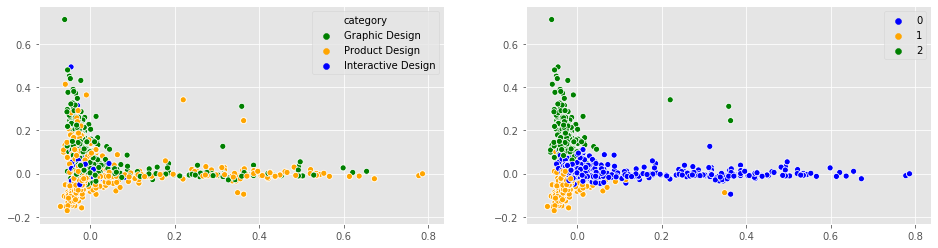

In [32]:
# Exercise 5.2.4 
from sklearn.decomposition import PCA
plt.style.use('ggplot')
pca = PCA(n_components=2)
X = pca.fit_transform(test_dtm.toarray())

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue = test["category"], palette=['green','orange','blue'] )

plt.subplot(1,2,2)
sns.scatterplot(x=X[:,0], y=X[:,1], hue = predicted, palette=['blue','orange','green'] )
plt.show()

In [34]:
# LDA can only use raw term counts for LDA 
tf_vectorizer = CountVectorizer(min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(large_train['blurb'])

test_lda = tf_vectorizer.transform(small_train['blurb'])
# each feature is a word (bag of words)
# get_feature_names() gives all words
tf_feature_names = tf_vectorizer.get_feature_names()

result=[]
for num_topics in range(2,10):
    lda = LatentDirichletAllocation(n_components=num_topics, learning_method='online', max_iter=30,verbose=0, n_jobs=1,
                                random_state=0).fit(tf)
    p=lda.perplexity(test_lda)
    result.append([num_topics,p])
    print(num_topics, p)

2 5720.759023842304
3 6741.288757132236
4 7836.783520898216
5 8527.661466546224
6 9326.981216064352
7 9844.243238636263
8 10279.49200878137
9 10878.245121390144


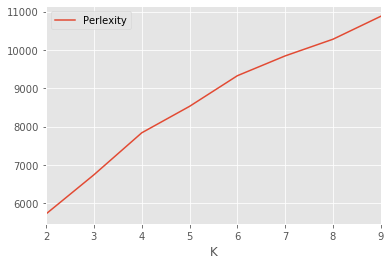

In [35]:
import pandas as pd
pd.DataFrame(result, columns=["K", "Perlexity"]).plot.line(x='K',y="Perlexity");
plt.show();

# Classification

In [2]:
import glob
# files = glob.glob("/Users/zhouxiao/Desktop/660/Project/data/robot_data/*/*.csv")
files = glob.glob("/Users/zhouxiao/Desktop/660/Project/data/Kickstarter_2021/Kickstarter_2021-04-15T03_20_08_451Z/*.csv")

i=1
df = pd.DataFrame()
for f in files:
    csv = pd.read_csv(f)
    csv = csv[~csv.category.isna() & ~csv.blurb.isna()]
#     csv = csv[csv.category.str.contains("categories/design") & ~csv.category.str.contains("architecture")\
#            & ~csv.category.str.contains("civic") & ~csv.category.str.contains("typography")\
#            & ~csv.category.str.contains("toys")]
    df = df.append(csv)
design = df.copy()

In [8]:
def get_clas_dataset(design):
    clas_dataset = design[['blurb','category','state']].copy()
    clas_dataset['category'] = clas_dataset['category'].apply(lambda x: json.loads(x)['name']).copy()
    clas_dataset = clas_dataset[clas_dataset['category']!='Design']
    clas_dataset = clas_dataset[(clas_dataset.state!='canceled') & (clas_dataset.state!='live')&(clas_dataset.state!='suspended')]

    clas_dataset = clas_dataset[~clas_dataset.duplicated()]

    clas_dataset = clas_dataset[['blurb','state','category']] 
    return clas_dataset

In [9]:
all_kind_dataset_2021 = get_clas_dataset(design)

In [22]:
all_kind_dataset_2021 = all_kind_dataset_2021.groupby('category').head(44)

In [23]:
all_kind_dataset_2021

blurb       state  \
0     An aquaponic system able  to grow large plants...      failed   
1     Creating artistic edibles with a sweet twist. ...      failed   
2     Bicycle® Deluxe. 56 Luxury Hand-Illustrated Pl...  successful   
3     PUP POPS are water-based ALL NATURAL pops for ...      failed   
4     For a limited time you can own these original ...  successful   
...                                                 ...         ...   
446   Merry Blipmas by 8bit'em'all, the first chiptu...      failed   
776   Kickstart Remute's new 7" vinyl (feat. Plavka!...  successful   
802   Put the upcoming Chiptune EP into the physical...  successful   
892   Master prop maker and creator of the dead fair...  successful   
2635  Pre-order my newest album and help create a re...  successful   

           category  
0            Spaces  
1            Spaces  
2     Playing Cards  
3       Small Batch  
4           Puzzles  
...             ...  
446        Chiptune  
776        Chiptune  
802        Chiptune  
892       Taxidermy  
2635       Chiptune  

[7006 rows x 3 columns]

In [24]:
clas_dataset = all_kind_dataset_2021[~all_kind_dataset_2021.duplicated()]
clas_dataset

blurb       state  \
0     An aquaponic system able  to grow large plants...      failed   
1     Creating artistic edibles with a sweet twist. ...      failed   
2     Bicycle® Deluxe. 56 Luxury Hand-Illustrated Pl...  successful   
3     PUP POPS are water-based ALL NATURAL pops for ...      failed   
4     For a limited time you can own these original ...  successful   
...                                                 ...         ...   
446   Merry Blipmas by 8bit'em'all, the first chiptu...      failed   
776   Kickstart Remute's new 7" vinyl (feat. Plavka!...  successful   
802   Put the upcoming Chiptune EP into the physical...  successful   
892   Master prop maker and creator of the dead fair...  successful   
2635  Pre-order my newest album and help create a re...  successful   

           category  
0            Spaces  
1            Spaces  
2     Playing Cards  
3       Small Batch  
4           Puzzles  
...             ...  
446        Chiptune  
776        Chiptune  
802        Chiptune  
892       Taxidermy  
2635       Chiptune  

[7006 rows x 3 columns]

## NB

In [25]:
from sklearn.naive_bayes import MultinomialNB
# import method to calculate metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, auc,precision_recall_curve
from sklearn.model_selection import cross_validate

from sklearn.pipeline import Pipeline

from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [26]:
clas_dataset[clas_dataset.state=='failed']

blurb   state     category
0     An aquaponic system able  to grow large plants...  failed       Spaces
1     Creating artistic edibles with a sweet twist. ...  failed       Spaces
3     PUP POPS are water-based ALL NATURAL pops for ...  failed  Small Batch
8     A line of nightshade-free pasta sauce and ketc...  failed  Small Batch
11    To document the marginalization of the Rohingy...  failed        Photo
...                                                 ...     ...          ...
2600  Creating beautiful and unique statement pieces...  failed    Taxidermy
3517  A double CD that also serves as accompaniments...  failed     Chiptune
89    The "Meteor Grip" ergonomic craft, taxidermy k...  failed    Taxidermy
99    Help us make our dreams come true, in the form...  failed     Chiptune
446   Merry Blipmas by 8bit'em'all, the first chiptu...  failed     Chiptune

[3072 rows x 3 columns]

In [27]:
clas_dataset

blurb       state  \
0     An aquaponic system able  to grow large plants...      failed   
1     Creating artistic edibles with a sweet twist. ...      failed   
2     Bicycle® Deluxe. 56 Luxury Hand-Illustrated Pl...  successful   
3     PUP POPS are water-based ALL NATURAL pops for ...      failed   
4     For a limited time you can own these original ...  successful   
...                                                 ...         ...   
446   Merry Blipmas by 8bit'em'all, the first chiptu...      failed   
776   Kickstart Remute's new 7" vinyl (feat. Plavka!...  successful   
802   Put the upcoming Chiptune EP into the physical...  successful   
892   Master prop maker and creator of the dead fair...  successful   
2635  Pre-order my newest album and help create a re...  successful   

           category  
0            Spaces  
1            Spaces  
2     Playing Cards  
3       Small Batch  
4           Puzzles  
...             ...  
446        Chiptune  
776        Chiptune  
802        Chiptune  
892       Taxidermy  
2635       Chiptune  

[7006 rows x 3 columns]

In [28]:
NB_train, NB_test = train_test_split(clas_dataset, test_size=0.3, random_state=0)

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
# each step is named, i.e. "tfidf", "clf"
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB())
                   ])

parameters = {'tfidf__min_df':[1, 2, 5, 10],
              'tfidf__stop_words':[None,"english"],
              'clf__alpha': [0.5,1.0,2.0],
}

# the metric used to select the best parameters
metric =  "f1_macro"

# GridSearch also uses cross validation
gs_clf = GridSearchCV(text_clf, param_grid=parameters, scoring=metric, cv=5)

gs_clf = gs_clf.fit(NB_train["blurb"], NB_train["state"])

for param_name in gs_clf.best_params_:
    print("{0}:\t{1}".format(param_name,gs_clf.best_params_[param_name]))

print("best f1 score: {:.3f}".format(gs_clf.best_score_))

clf__alpha:	0.5
tfidf__min_df:	2
tfidf__stop_words:	None
best f1 score: 0.626


In [40]:
tfidf_vect = TfidfVectorizer(stop_words = None, min_df = 2) 

# with stop words removed
#tfidf_vect = TfidfVectorizer(stop_words="english") 

# generate tfidf matrix
dtm= tfidf_vect.fit_transform(NB_train["blurb"])

# X_train, X_test, y_train, y_test = train_test_split(dtm, clas_dataset["state"], test_size=0.3, random_state=0)

# train a multinomial naive Bayes model using the testing data
clf = MultinomialNB(alpha=0.5).fit(dtm, NB_train["state"])

# predict the news group for the test dataset
test_dtm = tfidf_vect.transform(NB_test['blurb'])
predicted=clf.predict(test_dtm)

In [41]:
labels=sorted(NB_test["state"].unique())

# calculate performance metrics. 
# Support is the number of occurrences of each label


y_test= NB_test['state'].values
precision, recall, fscore, support=precision_recall_fscore_support(y_test, predicted, labels=labels)

print("labels: ", labels)
print("precision: ", precision)
print("recall: ", recall)
print("f-score: ", fscore)
print("support: ", support)

# another way to get all performance metrics
print(classification_report(y_test, predicted, target_names=labels))

labels:  ['failed', 'successful']
precision:  [0.58366271 0.65897245]
recall:  [0.49167592 0.73688593]
f-score:  [0.53373494 0.69575472]
support:  [ 901 1201]
              precision    recall  f1-score   support

      failed       0.58      0.49      0.53       901
  successful       0.66      0.74      0.70      1201

    accuracy                           0.63      2102
   macro avg       0.62      0.61      0.61      2102
weighted avg       0.63      0.63      0.63      2102



In [42]:
# We need to get probabilities as predictions
predict_p=clf.predict_proba(test_dtm)

# let's just look at one label "soc.religion.christian"
# convert to binary
binary_y = np.where(y_test=="successful",1,0)

# this label corresponds to last column
y_pred = predict_p[:,1]

# compute fpr/tpr by different thresholds
# positive class has label "1"
fpr, tpr, thresholds = roc_curve(binary_y, y_pred, pos_label=1)
# calculate auc
print("AUC: {:.2%}".format(auc(fpr, tpr)))

AUC: 68.34%


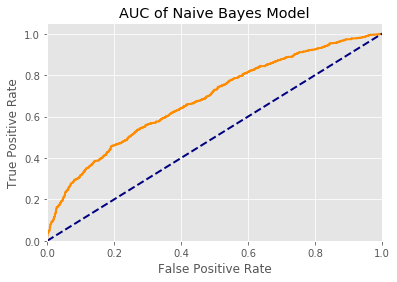

In [43]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('AUC of Naive Bayes Model');
plt.savefig('/Users/zhouxiao/Desktop/660/Project/results/2021_all_kinds/nb_auc.png',dpi=200)
plt.show();

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision_Recall_Curve of Naive Bayes Model')

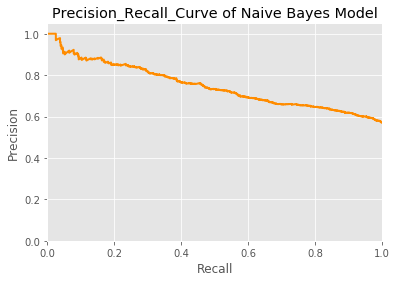

Average Precision: 74.79%


In [44]:
# Exercise 3.8.  precision_recall_curve

# compute precision/recall by different thresholds
precision, recall, thresholds = precision_recall_curve(binary_y, \
                                y_pred, pos_label=1)

plt.figure();
plt.plot(recall, precision, color='darkorange', lw=2);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('Recall');
plt.ylabel('Precision');
plt.title('Precision_Recall_Curve of Naive Bayes Model');
plt.savefig('/Users/zhouxiao/Desktop/660/Project/results/2021_all_kinds/nb_prc.png',dpi=200)
plt.show();

# Calculate area under PRC curver (a.k.a average precision)
# calculate auc
print("Average Precision: {:.2%}".format(auc(recall, precision)))

## SVM

In [45]:
from sklearn.svm import SVC

In [46]:
SVM_train, SVM_test = train_test_split(clas_dataset, test_size=0.3, random_state=0)

In [47]:
# SVM_train.to_csv('/Users/zhouxiao/Desktop/660/Project/SVM_ds_for_tune_para.csv')

In [68]:
# each step is named, i.e. "tfidf", "clf"
text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf',SVC())])

parameters = {'tfidf__min_df':[1,2,5,10],
              'tfidf__stop_words':[None,"english"],
#               'clf__kernel':['linear', 'poly', 'rbf'],
              'clf__C':[10,15,20]}

# the metric used to select the best parameters
metric =  "f1_macro"

# GridSearch also uses cross validation
gs_clf = GridSearchCV(text_clf, param_grid=parameters, scoring=metric, cv=5)

gs_clf = gs_clf.fit(SVM_train["blurb"], SVM_train["state"])

for param_name in gs_clf.best_params_:
    print("{0}:\t{1}".format(param_name,gs_clf.best_params_[param_name]))

print("best f1 score: {:.3f}".format(gs_clf.best_score_))

clf__C:	10
tfidf__min_df:	1
tfidf__stop_words:	None
best f1 score: 0.358


In [70]:
tfidf_vect = TfidfVectorizer(stop_words = None, min_df = 1) 

# with stop words removed
#tfidf_vect = TfidfVectorizer(stop_words="english") 

# generate tfidf matrix
dtm= tfidf_vect.fit_transform(SVM_train["blurb"])
test_dtm = tfidf_vect.transform(SVM_test['blurb'])

# train a multinomial naive Bayes model using the testing data
clf =SVC(C = 10,gamma='auto',kernel='linear',probability=True).fit(dtm, SVM_train['state'])
# predict the news group for the test dataset
predicted=clf.predict(test_dtm)

In [71]:
labels=sorted(SVM_test["state"].unique())

# calculate performance metrics. 
# Support is the number of occurrences of each label

y_test = SVM_test["state"].values
precision, recall, fscore, support=precision_recall_fscore_support(y_test, predicted, labels=labels)


print("labels: ", labels)
print("precision: ", precision)
print("recall: ", recall)
print("f-score: ", fscore)
print("support: ", support)

# another way to get all performance metrics
print(classification_report(y_test, predicted, target_names=labels))

labels:  ['failed', 'successful']
precision:  [0.52592593 0.65082109]
recall:  [0.55160932 0.62697752]
f-score:  [0.53846154 0.63867684]
support:  [ 901 1201]
              precision    recall  f1-score   support

      failed       0.53      0.55      0.54       901
  successful       0.65      0.63      0.64      1201

    accuracy                           0.59      2102
   macro avg       0.59      0.59      0.59      2102
weighted avg       0.60      0.59      0.60      2102



AUC: 61.65%


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'AUC of Support Vector Machine')

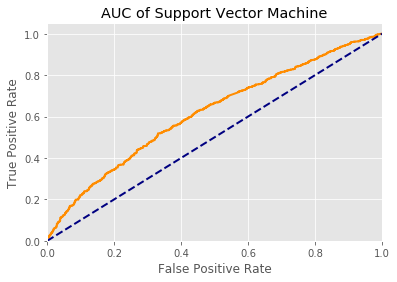

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision_Recall_Curve of Support Vector Machine')

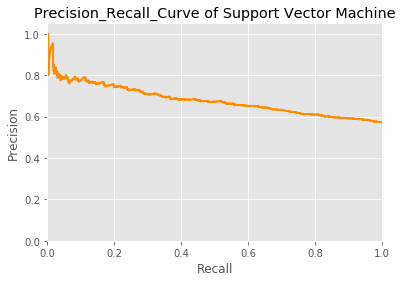

Average Precision: 67.87%


In [72]:
# We need to get probabilities as predictions
predict_p=clf.predict_proba(test_dtm)

# let's just look at one label "soc.religion.christian"
# convert to binary
binary_y = np.where(y_test=="successful",1,0)

# this label corresponds to last column
y_pred = predict_p[:,1]

# compute fpr/tpr by different thresholds
# positive class has label "1"
fpr, tpr, thresholds = roc_curve(binary_y, y_pred, pos_label=1)
# calculate auc
print("AUC: {:.2%}".format(auc(fpr, tpr)))


plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('AUC of Support Vector Machine');
plt.savefig('/Users/zhouxiao/Desktop/660/Project/results/2021_all_kinds/svm_auc.png',dpi=200)
plt.show();

# Exercise 3.8.  precision_recall_curve

# compute precision/recall by different thresholds
precision, recall, thresholds = precision_recall_curve(binary_y, \
                                y_pred, pos_label=1)

plt.figure();
plt.plot(recall, precision, color='darkorange', lw=2);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('Recall');
plt.ylabel('Precision');
plt.title('Precision_Recall_Curve of Support Vector Machine');
plt.savefig('/Users/zhouxiao/Desktop/660/Project/results/2021_all_kinds/svm_prc.png',dpi=200)
plt.show();

# Calculate area under PRC curver (a.k.a average precision)
# calculate auc
print("Average Precision: {:.2%}".format(auc(recall, precision)))

# random forest

In [73]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [74]:
clas_dataset[(clas_dataset.state!='successful')&(clas_dataset.state!='failed')]
clas_dataset =  clas_dataset[clas_dataset.state!='suspended']

Empty DataFrame
Columns: [blurb, state, category]
Index: []

In [75]:
rm_train, rm_test = train_test_split(clas_dataset, test_size=0.3, random_state=0)

In [76]:
def return_o_1_label(x):
    if x=='successful':
        return 1
    if x=='failed':
        return 0

In [77]:
tfidf_vect = TfidfVectorizer(stop_words = None,min_df = 1) 
dtm= tfidf_vect.fit_transform(rm_train["blurb"])

rm_train_dtm = pd.DataFrame(dtm.toarray(),columns=tfidf_vect.get_feature_names())

rm_train_dtm['state'] = rm_train['state'].values.copy()
rm_train_dtm['state'] = rm_train_dtm['state'].apply(lambda x: return_o_1_label(x)).copy()


In [78]:
rm_train_dtm

00  000  000s   07   10  100  1000  1000x  100acre  100kg  ...  \
0     0.0  0.0   0.0  0.0  0.0  0.0   0.0    0.0      0.0    0.0  ...   
1     0.0  0.0   0.0  0.0  0.0  0.0   0.0    0.0      0.0    0.0  ...   
2     0.0  0.0   0.0  0.0  0.0  0.0   0.0    0.0      0.0    0.0  ...   
3     0.0  0.0   0.0  0.0  0.0  0.0   0.0    0.0      0.0    0.0  ...   
4     0.0  0.0   0.0  0.0  0.0  0.0   0.0    0.0      0.0    0.0  ...   
...   ...  ...   ...  ...  ...  ...   ...    ...      ...    ...  ...   
4899  0.0  0.0   0.0  0.0  0.0  0.0   0.0    0.0      0.0    0.0  ...   
4900  0.0  0.0   0.0  0.0  0.0  0.0   0.0    0.0      0.0    0.0  ...   
4901  0.0  0.0   0.0  0.0  0.0  0.0   0.0    0.0      0.0    0.0  ...   
4902  0.0  0.0   0.0  0.0  0.0  0.0   0.0    0.0      0.0    0.0  ...   
4903  0.0  0.0   0.0  0.0  0.0  0.0   0.0    0.0      0.0    0.0  ...   

      オーケストラｃｄ録音  スターデューバレー  亦保留傳統書法遺風  仿行明體既具明體的易讀性  原創貓咪水彩風紙膠帶  用在任何產品之上  \
0            0.0        0.0        0.0           0.0         0.0       0.0   
1            0.0        0.0        0.0           0.0         0.0       0.0   
2            0.0        0.0        0.0           0.0         0.0       0.0   
3            0.0        0.0        0.0           0.0         0.0       0.0   
4            0.0        0.0        0.0           0.0         0.0       0.0   
...          ...        ...        ...           ...         ...       ...   
4899         0.0        0.0        0.0           0.0         0.0       0.0   
4900         0.0        0.0        0.0           0.0         0.0       0.0   
4901         0.0        0.0        0.0           0.0         0.0       0.0   
4902         0.0        0.0        0.0           0.0         0.0       0.0   
4903         0.0        0.0        0.0           0.0         0.0       0.0   

      都能倍增韻味  雅上添致  青年共創港產科幻迷你網劇實驗企劃   택호  
0        0.0   0.0               0.0  0.0  
1        0.0   0.0               0.0  0.0  
2        0.0   0.0               0.0  0.0  
3        0.0   0.0               0.0  0.0  
4        0.0   0.0               0.0  0.0  
...      ...   ...               ...  ...  
4899     0.0   0.0               0.0  0.0  
4900     0.0   0.0               0.0  0.0  
4901     0.0   0.0               0.0  0.0  
4902     0.0   0.0               0.0  0.0  
4903     0.0   0.0               0.0  0.0  

[4904 rows x 14070 columns]

In [79]:
max_depth = [None, 7, 15]
min_samples_split = [10, 20, 25,40]
random_grid = {'max_depth': max_depth, 'min_samples_split': min_samples_split}
rf_best = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf_best, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(rm_train_dtm.loc[:,rm_train_dtm.columns != 'state'], rm_train_dtm['state'])
rf_random.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

{'min_samples_split': 40, 'max_depth': 15}

In [80]:
X_train = rm_train_dtm.loc[:,rm_train_dtm.columns != 'state']
y_train = rm_train_dtm['state']

rm_test_dtm = tfidf_vect.transform(rm_test["blurb"])

rm_test_dtm = pd.DataFrame(rm_test_dtm.toarray(),columns=tfidf_vect.get_feature_names())

rm_test_dtm['state'] = rm_test['state'].values.copy()
rm_test_dtm['state'] = rm_test_dtm['state'].apply(lambda x: return_o_1_label(x)).copy()

X_test = rm_test_dtm.loc[:,rm_test_dtm.columns != 'state']
y_test = rm_test_dtm['state']

clf = RandomForestClassifier(n_estimators=100, max_depth=15,  min_samples_split=40, random_state=0)
scores = cross_val_score(clf, X_train, y_train)
print('Random Forest score = ',scores)
# result= RandomForestClassifier(n_estimators=100, max_depth=7,  min_samples_split=2, random_state=0)
rate=clf.fit(X_train,y_train).predict(X_test)

# Extract single tree
estimator = clf.estimators_[5]
# rate

# Plot tree from random forest

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot',      # set, max_depth=
                feature_names = X_test.columns,
                class_names = X_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename =  'tree.png')

Random Forest score =  [0.5675841  0.56452599 0.56731946]


0

In [81]:
predicted=clf.predict(X_test)
labels=sorted(rm_test_dtm["state"].unique())


# calculate performance metrics. 
# Support is the number of occurrences of each label

y_test = rm_test_dtm["state"].values
precision, recall, fscore, support=precision_recall_fscore_support(y_test, predicted, labels=labels)

print("labels: ", labels)
print("precision: ", precision)
print("recall: ", recall)
print("f-score: ", fscore)
print("support: ", support)

# another way to get all performance metrics
print(classification_report(np.where(y_test==1, 'successful', 'failed'), \
                            np.where(predicted==1, 'successful', 'failed'), \
                            target_names=['successful','failed']))

labels:  [0, 1]
precision:  [0.7654321  0.58485898]
recall:  [0.06881243 0.98417985]
f-score:  [0.12627291 0.73370577]
support:  [ 901 1201]
              precision    recall  f1-score   support

  successful       0.77      0.07      0.13       901
      failed       0.58      0.98      0.73      1201

    accuracy                           0.59      2102
   macro avg       0.68      0.53      0.43      2102
weighted avg       0.66      0.59      0.47      2102



AUC: 68.46%


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'AUC of Random Forest')

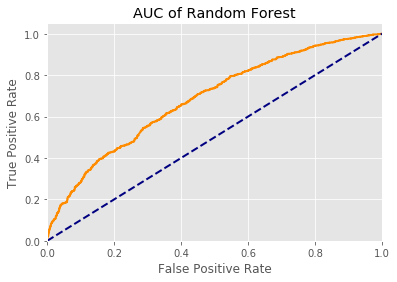

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision_Recall_Curve of Random Forest')

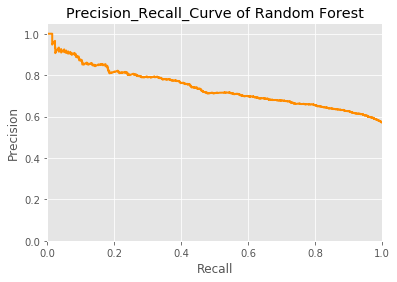

Average Precision: 73.94%


In [82]:
# We need to get probabilities as predictions
predict_p=clf.predict_proba(X_test)

# let's just look at one label "soc.religion.christian"
# convert to binary
binary_y = y_test

# this label corresponds to last column
y_pred = predict_p[:,1]

# compute fpr/tpr by different thresholds
# positive class has label "1"
fpr, tpr, thresholds = roc_curve(binary_y, y_pred, pos_label=1)
# calculate auc
print("AUC: {:.2%}".format(auc(fpr, tpr)))

plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('AUC of Random Forest');
plt.savefig('/Users/zhouxiao/Desktop/660/Project/results/2021_all_kinds/rf_auc.png',dpi=200)
plt.show();

# Exercise 3.8.  precision_recall_curve

# compute precision/recall by different thresholds
precision, recall, thresholds = precision_recall_curve(binary_y, \
                                y_pred, pos_label=1)

plt.figure();
plt.plot(recall, precision, color='darkorange', lw=2);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('Recall');
plt.ylabel('Precision');
plt.title('Precision_Recall_Curve of Random Forest');
plt.savefig('/Users/zhouxiao/Desktop/660/Project/results/2021_all_kinds/rf_prc.png',dpi=200)
plt.show();

# Calculate area under PRC curver (a.k.a average precision)
# calculate auc
print("Average Precision: {:.2%}".format(auc(recall, precision)))